In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

df = pd.read_csv('Iris.csv')
print("Первые 5 строк данных:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())

Первые 5 строк данных:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(


Размер данных: (100, 2)
Количество примеров: 100
Классов: [0 1] (0 - setosa, 1 - versicolor)

Обучающая выборка: (70, 2)
Тестовая выборка: (30, 2)
Резульаты
Веса: w1 (SepalLength) = 20.3000, w2 (SepalWidth) = -35.7000
Смещение (bias): -5.0000
Точность на тесте: 0.9333 (93.33%)


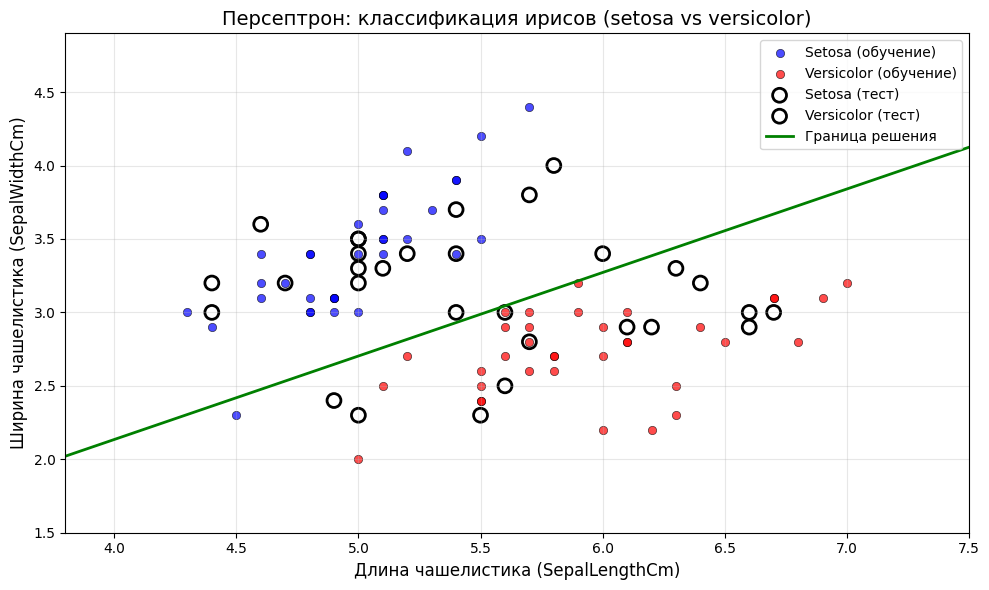

Примеры предсказываний
Пример 1: SepalLength=4.4, SepalWidth=3.0 -> Предсказано: Setosa, Реально: Setosa ✓
Пример 2: SepalLength=5.0, SepalWidth=3.5 -> Предсказано: Setosa, Реально: Setosa ✓
Пример 3: SepalLength=5.4, SepalWidth=3.0 -> Предсказано: Setosa, Реально: Versicolor ✗
Пример 4: SepalLength=5.1, SepalWidth=3.3 -> Предсказано: Setosa, Реально: Setosa ✓
Пример 5: SepalLength=4.4, SepalWidth=3.2 -> Предсказано: Setosa, Реально: Setosa ✓
Пример 6: SepalLength=5.5, SepalWidth=2.3 -> Предсказано: Versicolor, Реально: Versicolor ✓
Пример 7: SepalLength=5.7, SepalWidth=2.8 -> Предсказано: Versicolor, Реально: Versicolor ✓
Пример 8: SepalLength=6.0, SepalWidth=3.4 -> Предсказано: Setosa, Реально: Versicolor ✗

Ошибочно классифицировано: 2 из 30
  Ошибка: SepalLength=5.4, SepalWidth=3.0 ->предсказано Setosa, реально Versicolor
  Ошибка: SepalLength=6.0, SepalWidth=3.4 ->предсказано Setosa, реально Versicolor


In [5]:
df_filtered = df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
X = df_filtered[['SepalLengthCm', 'SepalWidthCm']].values
y = df_filtered['Species'].values

y = np.where(y == 'Iris-setosa', 0, 1)

print(f"\nРазмер данных: {X.shape}")
print(f"Количество примеров: {len(X)}")
print(f"Классов: {np.unique(y)} (0 - setosa, 1 - versicolor)")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nОбучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

perceptron = Perceptron(max_iter=100, random_state=42)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Резульаты")
print(f"Веса: w1 (SepalLength) = {perceptron.coef_[0][0]:.4f}, "
      f"w2 (SepalWidth) = {perceptron.coef_[0][1]:.4f}")
print(f"Смещение (bias): {perceptron.intercept_[0]:.4f}")
print(f"Точность на тесте: {accuracy:.4f} ({accuracy*100:.2f}%)")

plt.figure(figsize=(10, 6))

colors = {0: 'blue', 1: 'red'}
labels = {0: 'Setosa', 1: 'Versicolor'}

for class_value in [0, 1]:
    mask = y_train == class_value
    plt.scatter(X_train[mask, 0], X_train[mask, 1], 
                color=colors[class_value], 
                label=f'{labels[class_value]} (обучение)', 
                alpha=0.7, edgecolors='black', linewidth=0.5)

for class_value in [0, 1]:
    mask = y_test == class_value
    plt.scatter(X_test[mask, 0], X_test[mask, 1], 
                color=colors[class_value], 
                marker='o', s=100, facecolors='none', 
                edgecolors='black', linewidth=2,
                label=f'{labels[class_value]} (тест)')

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

if perceptron.coef_[0][1] != 0:
    x_line = np.linspace(x_min, x_max, 100)
    y_line = -(perceptron.coef_[0][0] * x_line + perceptron.intercept_[0]) / perceptron.coef_[0][1]
    plt.plot(x_line, y_line, 'g-', linewidth=2, label='Граница решения')

plt.xlabel('Длина чашелистика (SepalLengthCm)', fontsize=12)
plt.ylabel('Ширина чашелистика (SepalWidthCm)', fontsize=12)
plt.title('Персептрон: классификация ирисов (setosa vs versicolor)', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()

print("Примеры предсказываний")

for i in range(min(8, len(X_test))):
    pred = perceptron.predict([X_test[i]])[0]
    actual = y_test[i]
    pred_label = 'Setosa' if pred == 0 else 'Versicolor'
    actual_label = 'Setosa' if actual == 0 else 'Versicolor'
    mark = '✓' if pred == actual else '✗'
    print(f"Пример {i+1}: SepalLength={X_test[i][0]:.1f}, SepalWidth={X_test[i][1]:.1f} -> "
          f"Предсказано: {pred_label}, Реально: {actual_label} {mark}")

errors = y_test != y_pred
if np.sum(errors) > 0:
    print(f"\nОшибочно классифицировано: {np.sum(errors)} из {len(y_test)}")
    for i in range(len(y_test)):
        if errors[i]:
            print(f"  Ошибка: SepalLength={X_test[i][0]:.1f}, SepalWidth={X_test[i][1]:.1f} ->"
                  f"предсказано {'Setosa' if y_pred[i]==0 else 'Versicolor'}, "
                  f"реально {'Setosa' if y_test[i]==0 else 'Versicolor'}")
else:
    print(f"\nОшибок нет")